# Color analysis

#### Reference colors

CSS https://www.w3.org/wiki/CSS/Properties/color/keywords

CSS4 https://matplotlib.org/3.1.1/gallery/color/named_colors.html

##### CSS4 SELECTION

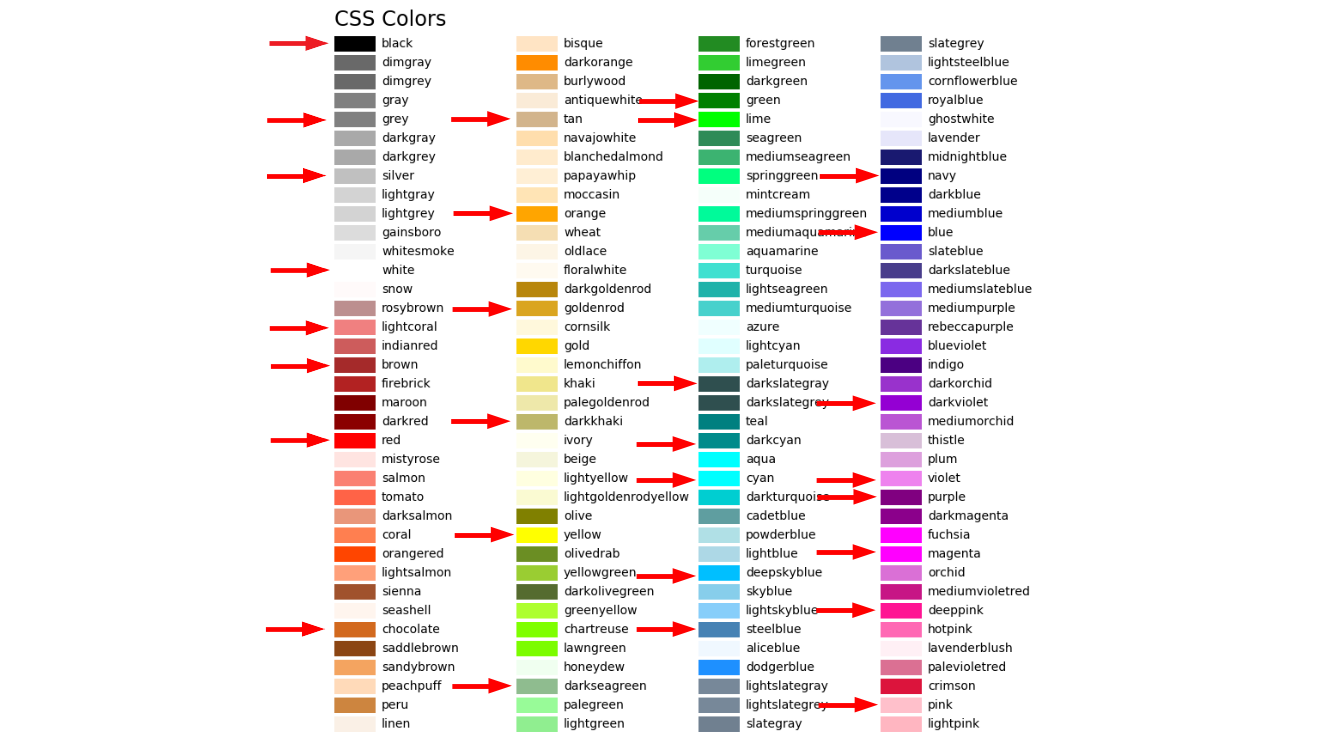

In [1]:
from IPython.display import Image
Image(filename='clean.png')

## Load data

In [3]:
import pandas as pd

In [4]:
cdf = pd.read_csv('frame_centroids.csv')

In [7]:
cdf.tail()

,movie_id,movie_title,year,frame_id,centroid_id,red,green,blue
150125,128,Finding.Dory.2016,2010,181,5,0.115939,0.248223,0.311750
150126,128,Finding.Dory.2016,2010,181,6,0.043960,0.137422,0.191808
150127,128,Finding.Dory.2016,2010,181,7,0.821820,0.788718,0.879253
150128,128,Finding.Dory.2016,2010,181,8,0.530045,0.594518,0.491963
150129,128,Finding.Dory.2016,2010,181,9,0.543487,0.307460,0.241669


In [5]:
cdf.shape

(150130, 8)

In [6]:
print('Total centroids:', cdf.shape[0])

Total centroids: 150130


In [7]:
print('Total frames:', cdf.shape[0]/10)

Total frames: 15013.0


In [8]:
print('Total movies:', len(cdf['movie_id'].unique()))

Total movies: 129


In [9]:
cdf['rgb'] = [(i[-3], i[-2], i[-1]) for i in cdf.values]
cdf.drop(columns=['red', 'green', 'blue'], axis=1, inplace=True)
cdf.head()

,movie_id,movie_title,year,frame_id,centroid_id,rgb
0,0,make_mine_music,1940,0,0,"(0.4948409661638601, 0.3336431652742103, 0.382..."
1,0,make_mine_music,1940,0,1,"(0.5387126649529148, 0.5742250325642928, 0.639..."
2,0,make_mine_music,1940,0,2,"(0.36366959978116187, 0.4204748239497644, 0.55..."
3,0,make_mine_music,1940,0,3,"(0.2441414631891009, 0.31293046306577865, 0.42..."
4,0,make_mine_music,1940,0,4,"(0.7276261576840661, 0.7455248882923641, 0.815..."


## Data exploration

In [10]:
header = ['decade', 'movies', 'frames', 'centroids']
metadata_matrix = []

decades = cdf['year'].unique()

for d in decades:
    tmp_df = cdf[cdf['year'] == d]
    nm = len(tmp_df['movie_id'].unique())
    nc = tmp_df.shape[0]
    nf = nc / 10
    metadata_matrix.append([d, nm, nf, nc])
    
metadata_df = pd.DataFrame(data=metadata_matrix, columns=header)
metadata_df.sort_values(by=['decade'])

,decade,movies,frames,centroids
6,1930,41,821.0,8210
0,1940,7,894.0,8940
8,1950,5,679.0,6790
7,1960,3,428.0,4280
4,1970,4,567.0,5670
5,1980,5,726.0,7260
3,1990,15,2364.0,23640
1,2000,24,3952.0,39520
2,2010,25,4582.0,45820


## Assign reference colors to centroids

In [11]:
import numpy as np
from skimage import color
from skimage.color import rgb2lab, deltaE_cie76
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [12]:
def to_image(pixel):
    return [[pixel]]

def to_pixel(image):
    return image[0][0]

def convert_rgb2lab(rgb_pixel):
    return to_pixel(color.rgb2lab(to_image(rgb_pixel)))

In [13]:
CSS_COLORS = [
    'black',
    'silver',
    'gray',
    'white',
    'maroon',
    'red',
    'purple',
    'fuchsia',
    'green',
    'lime',
    'olive',
    'yellow',
    'navy',
    'blue',
    'teal',
    'aqua'
]

CSS4_SELECTION_COLORS = [
    'black',
    'silver',
    'gray',
    'white',
    'lightcoral',
    'red',
    'maroon', #'brown'
    'chocolate',
    'tan',
    'orange',
    'goldenrod',
    'darkkhaki',
    'yellow',
    'darkseagreen',
    'green',
    'lime',
    'darkslategray',
    'darkcyan',
    'cyan',
    'deepskyblue',
    'steelblue',
    'navy',
    'blue',
    'darkviolet',
    'violet',
    'purple',
    'magenta',
    'deeppink',
    'pink'   
]

print('DISTINCT CSS:\t\t', len(CSS_COLORS), '\nDISTINCT CSS4_SELECTION:', len(CSS4_SELECTION_COLORS))

DISTINCT CSS:		 16 
DISTINCT CSS4_SELECTION: 29


In [14]:
CSS4_HEX_COLORS = list(mcolors.CSS4_COLORS.values())
CSS4_RGB_COLORS = [mcolors.hex2color(c) for c in mcolors.CSS4_COLORS]
CSS4_LAB_COLORS = [convert_rgb2lab(c) for c in CSS4_RGB_COLORS]

BASE_RGB_COLORS = [[float(v) for v in c] for c in mcolors.BASE_COLORS.values()]
BASE_LAB_COLORS = [convert_rgb2lab(c) for c in BASE_RGB_COLORS]

CSS_HEX_COLORS  = [mcolors.CSS4_COLORS[c] for c in CSS_COLORS]
CSS_RGB_COLORS  = [mcolors.hex2color(c) for c in CSS_HEX_COLORS]
CSS_LAB_COLORS  = [convert_rgb2lab(c) for c in CSS_RGB_COLORS]

CSS4_SEL_HEX_COLORS  = [mcolors.CSS4_COLORS[c] for c in CSS4_SELECTION_COLORS]
CSS4_SEL_RGB_COLORS  = [mcolors.hex2color(c) for c in CSS4_SEL_HEX_COLORS]
CSS4_SEL_LAB_COLORS  = [convert_rgb2lab(c) for c in CSS4_SEL_RGB_COLORS]

In [15]:
colors = {
    'CSS': {
        'HEX': CSS_HEX_COLORS,
        'RGB': CSS_RGB_COLORS,
        'LAB': CSS_LAB_COLORS
    },
    'CSS4': {
        'HEX': CSS4_HEX_COLORS,
        'RGB': CSS4_RGB_COLORS,
        'LAB': CSS4_LAB_COLORS
    },
    'CSS4_SEL': {
        'HEX': CSS4_SEL_HEX_COLORS,
        'RGB': CSS4_SEL_RGB_COLORS,
        'LAB': CSS4_SEL_LAB_COLORS
    }
}

In [16]:
CSS4_INV_MAP = {}
for k, v in mcolors.CSS4_COLORS.items():
    CSS4_INV_MAP[v] = k

In [17]:
def get_ref_color(rgb_color, ref_colors):
    ref_lab_colors = colors[ref_colors]['LAB']
    ref_rgb_colors = colors[ref_colors]['RGB']
    ref_hex_colors = colors[ref_colors]['HEX']
    
    lab_color = convert_rgb2lab(rgb_color)
    
    min_distance = deltaE_cie76(lab_color, ref_lab_colors[0])
    nearest_ref_color = 0

    k = 1
    for c in ref_lab_colors[1:]: # CSS4_LAB_COLORS[0] already processed above
        tmp_distance = deltaE_cie76(lab_color, c)
        if (tmp_distance < min_distance):
            min_distance = tmp_distance
            nearest_ref_color = k
        k += 1

    return ref_rgb_colors[nearest_ref_color], ref_hex_colors[nearest_ref_color]

In [18]:
def add_ref_column(df, palette_id):
    df['ref_color_rgb_hex'] = df['rgb'].apply(lambda x: get_ref_color(x, palette_id))
    df[palette_id + '_ref_color_rgb'] = [i[0] for i in df['ref_color_rgb_hex']]
    df[palette_id + '_ref_color_hex'] = [i[1] for i in df['ref_color_rgb_hex']]
    df.drop(columns=['ref_color_rgb_hex'], axis=1, inplace=True)

In [19]:
%%time
add_ref_column(cdf, 'CSS')
add_ref_column(cdf, 'CSS4_SEL')
cdf.head()

CPU times: user 59.5 s, sys: 566 ms, total: 1min
Wall time: 59.3 s


,movie_id,movie_title,year,frame_id,centroid_id,rgb,CSS_ref_color_rgb,CSS_ref_color_hex,CSS4_SEL_ref_color_rgb,CSS4_SEL_ref_color_hex
0,0,make_mine_music,1940,0,0,"(0.4948409661638601, 0.3336431652742103, 0.382...","(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.5019607843137255, 0.5019607843137255, 0.501...",#808080
1,0,make_mine_music,1940,0,1,"(0.5387126649529148, 0.5742250325642928, 0.639...","(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.5019607843137255, 0.5019607843137255, 0.501...",#808080
2,0,make_mine_music,1940,0,2,"(0.36366959978116187, 0.4204748239497644, 0.55...","(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.27450980392156865, 0.5098039215686274, 0.70...",#4682B4
3,0,make_mine_music,1940,0,3,"(0.2441414631891009, 0.31293046306577865, 0.42...","(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.1843137254901961, 0.30980392156862746, 0.30...",#2F4F4F
4,0,make_mine_music,1940,0,4,"(0.7276261576840661, 0.7455248882923641, 0.815...","(0.7529411764705882, 0.7529411764705882, 0.752...",#C0C0C0,"(0.7529411764705882, 0.7529411764705882, 0.752...",#C0C0C0


In [20]:
def plot_ref_colors(df, ref_colors_column='ref_color', title='', normalize=True):        
    value_counts = df[ref_colors_column].value_counts(normalize=normalize)
    plt.figure(figsize = (20, 6))
    value_counts.plot(kind = 'bar', color = list(value_counts.index))
    
    if title != '':
        plt.title(title)
    plt.show()
    return

### CSS

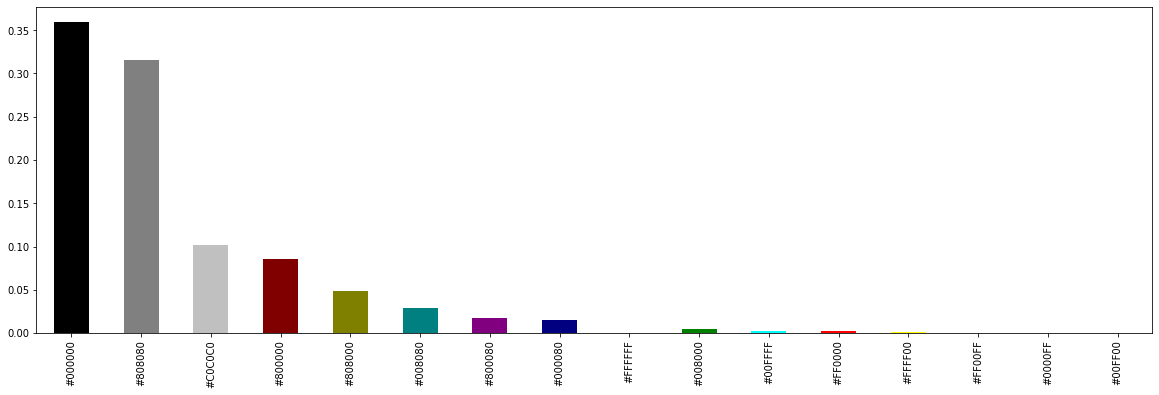

In [21]:
plot_ref_colors(cdf, 'CSS_ref_color_hex')

### CSS4

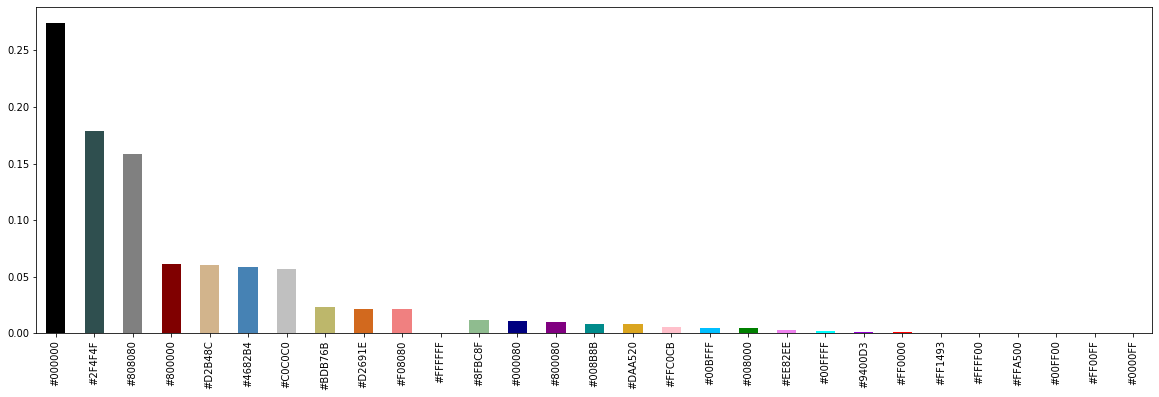

In [22]:
plot_ref_colors(cdf, 'CSS4_SEL_ref_color_hex')

## Stats

### Dataset split and Feature selection

In [23]:
css_cdf = cdf.drop(['CSS_ref_color_rgb', 'CSS4_SEL_ref_color_rgb', 'CSS4_SEL_ref_color_hex'], axis=1)
css_cdf.rename(columns={"CSS_ref_color_hex": "ref_color"}, inplace=True)
                   
css4_cdf = cdf.drop(['CSS_ref_color_rgb', 'CSS_ref_color_hex', 'CSS4_SEL_ref_color_rgb'], axis=1)
css4_cdf.rename(columns={"CSS4_SEL_ref_color_hex": "ref_color"}, inplace=True)

### Remove outliers

In [24]:
def remove_outliers(df, outliers):
    return df[~df['ref_color'].isin(outliers)]

In [25]:
css_cdf = remove_outliers(css_cdf, ['#000000', '#808080'])
css4_cdf = remove_outliers(css4_cdf, ['#000000'])

### Reference colors plots

#### CSS

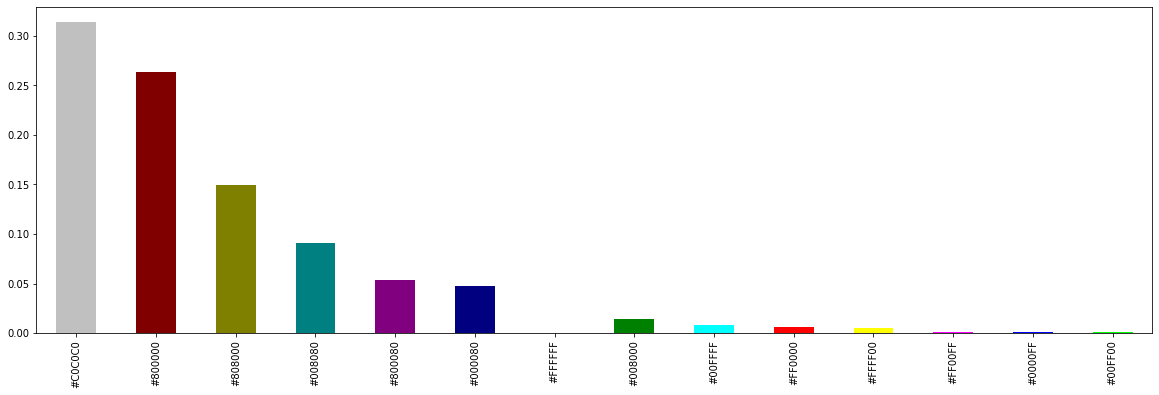

In [26]:
plot_ref_colors(css_cdf)

#### CSS4 

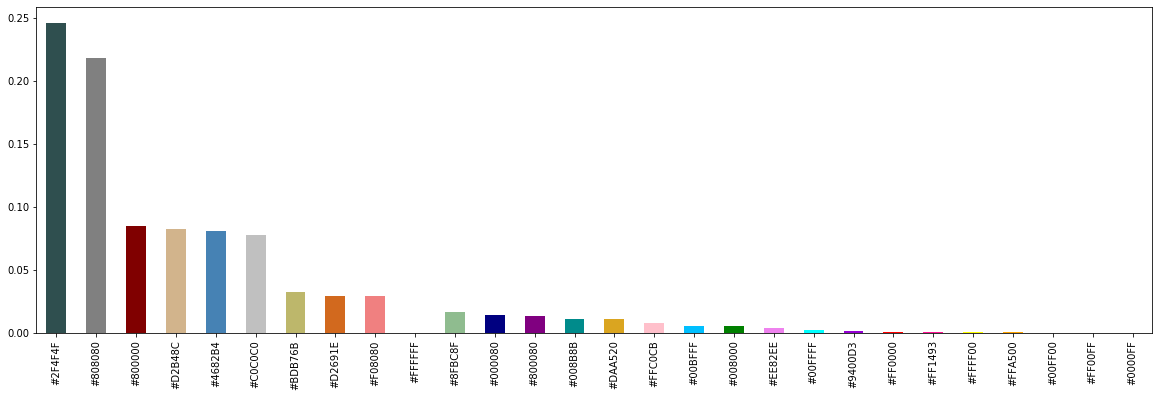

In [27]:
plot_ref_colors(css4_cdf)

### Colors distributions for each decade

In [28]:
def plot_color_for_each_decade(df):
    for d in range(1930, 2010 + 1, 10):
        plot_ref_colors(df[df['year'] == d], title=str(d))

#### CSS

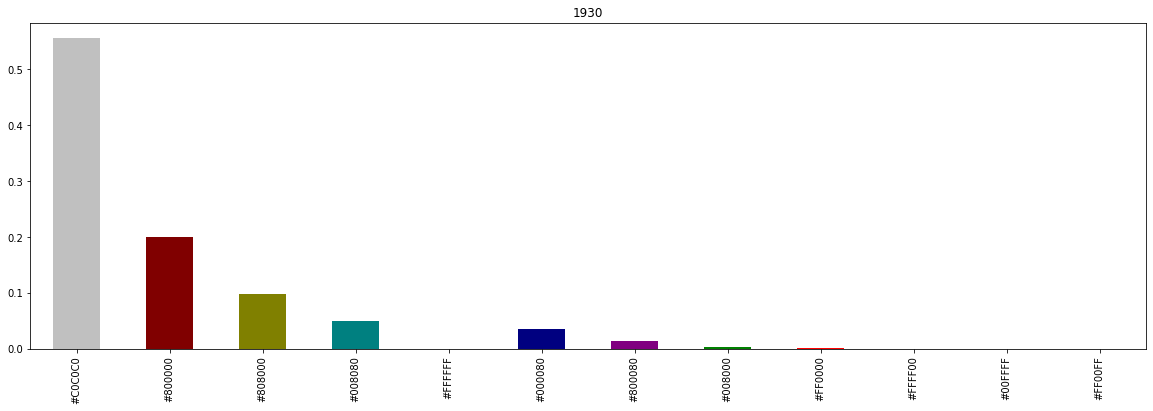

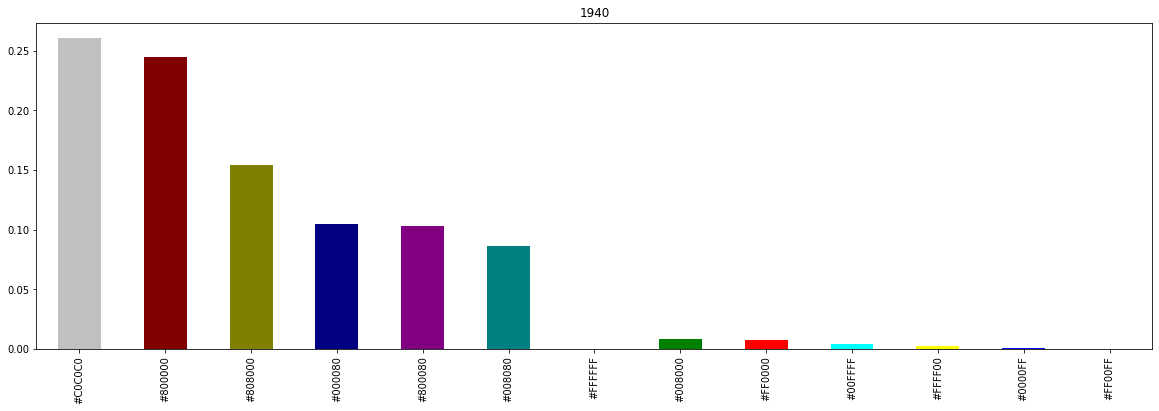

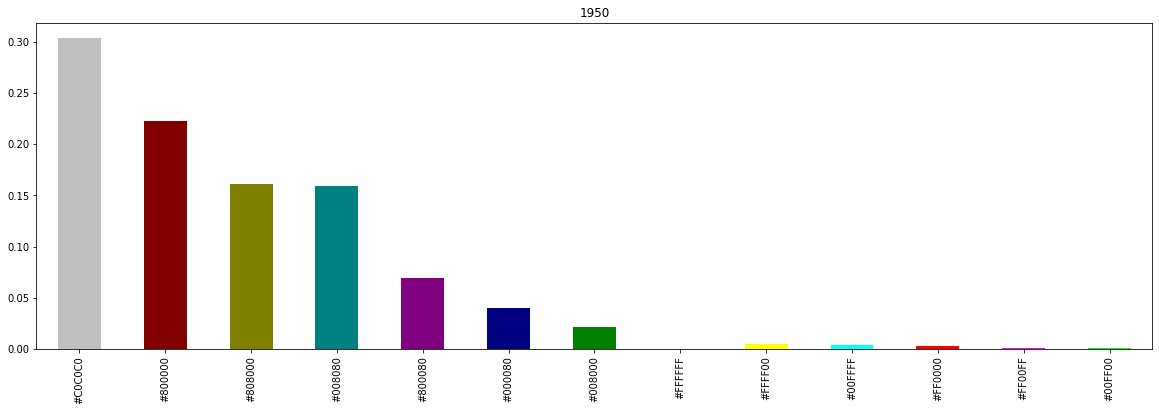

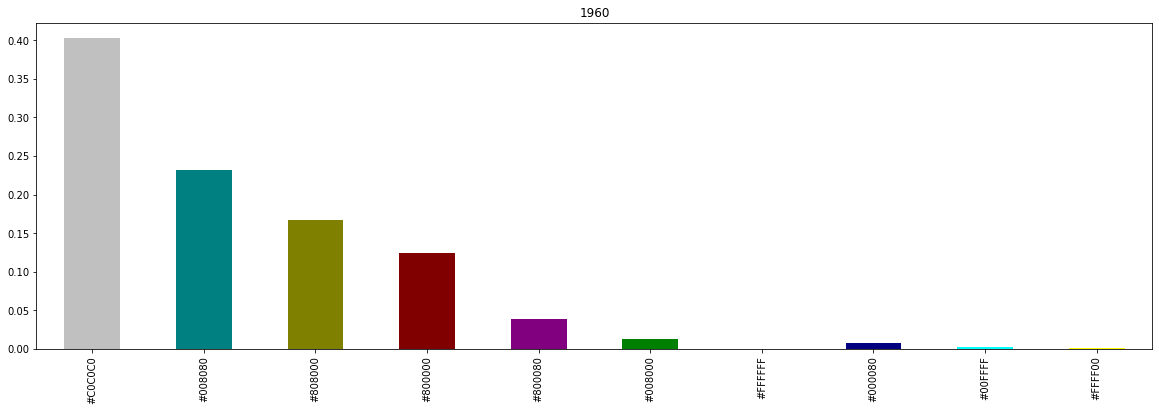

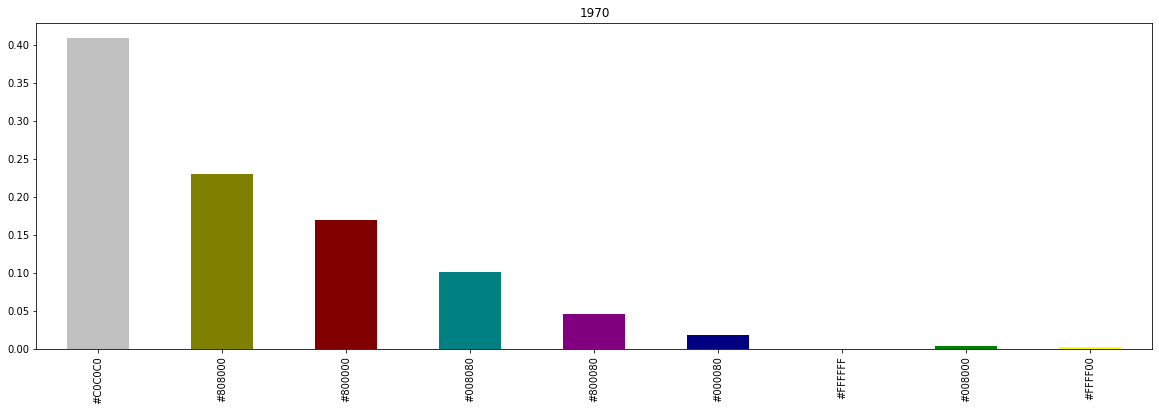

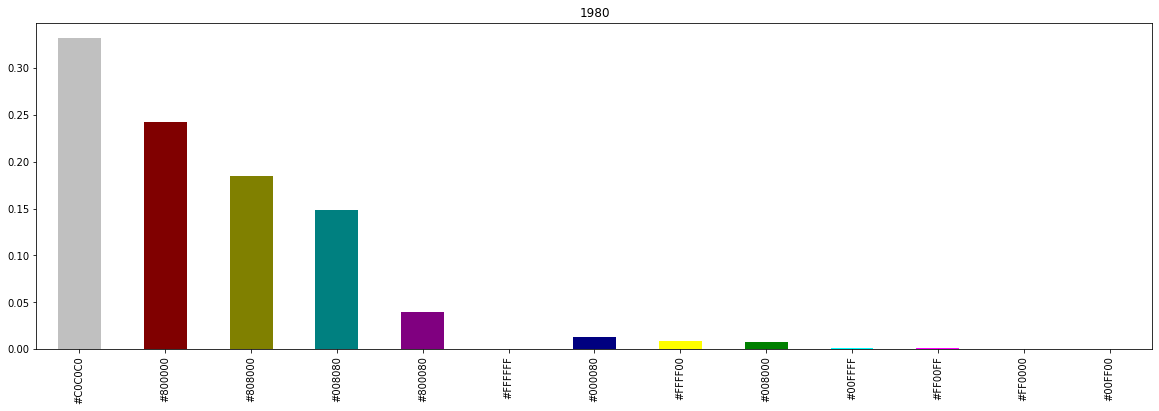

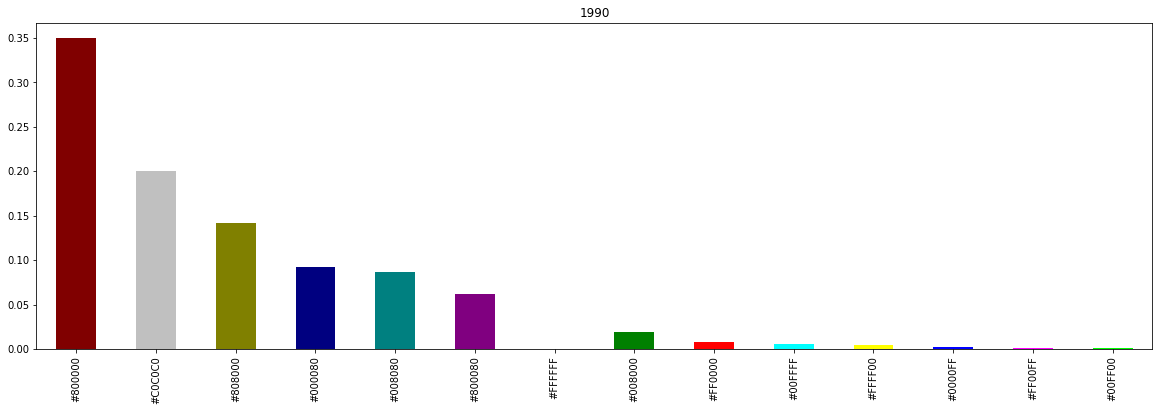

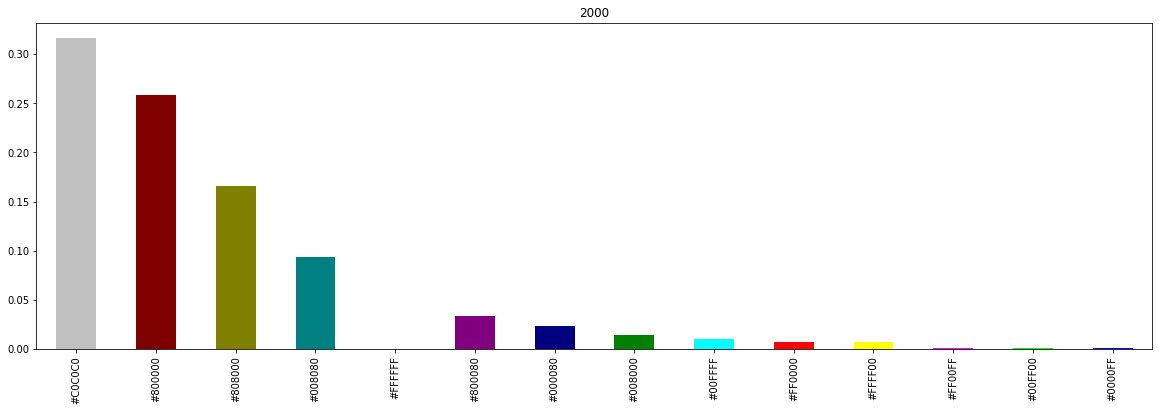

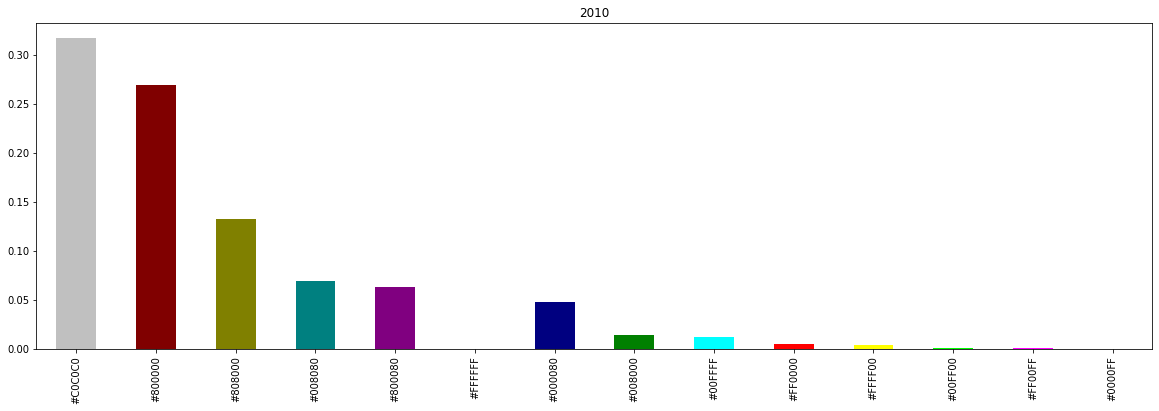

In [29]:
plot_color_for_each_decade(css_cdf)

#### CSS4

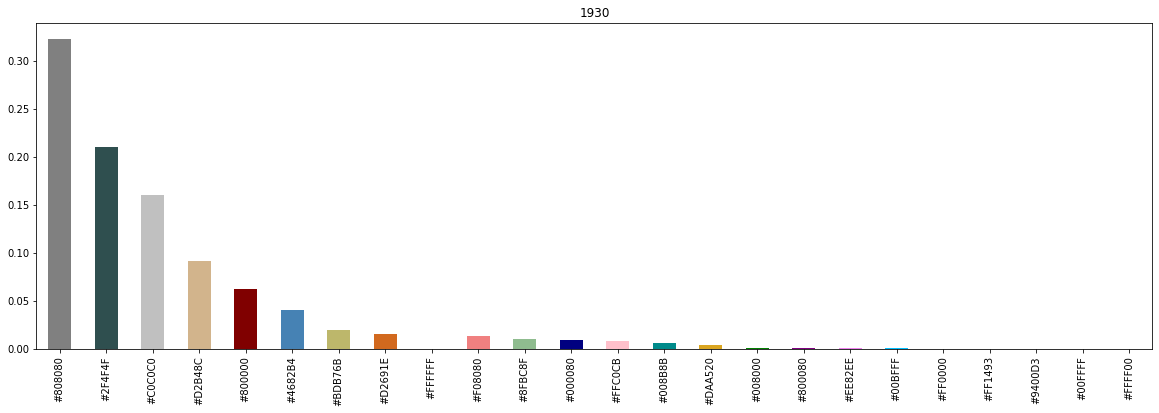

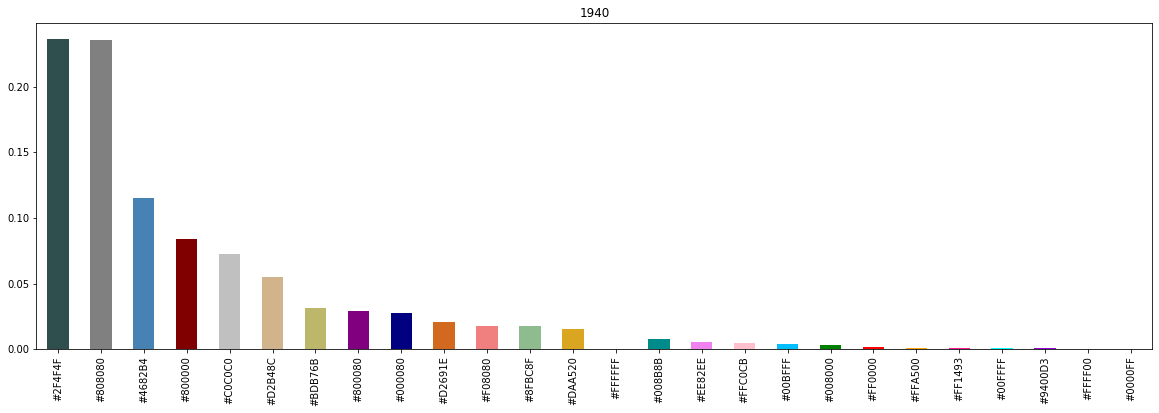

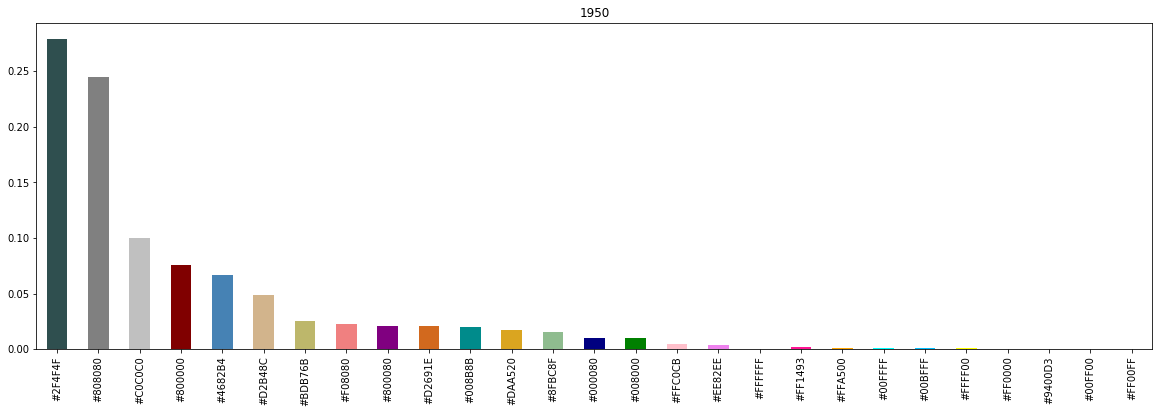

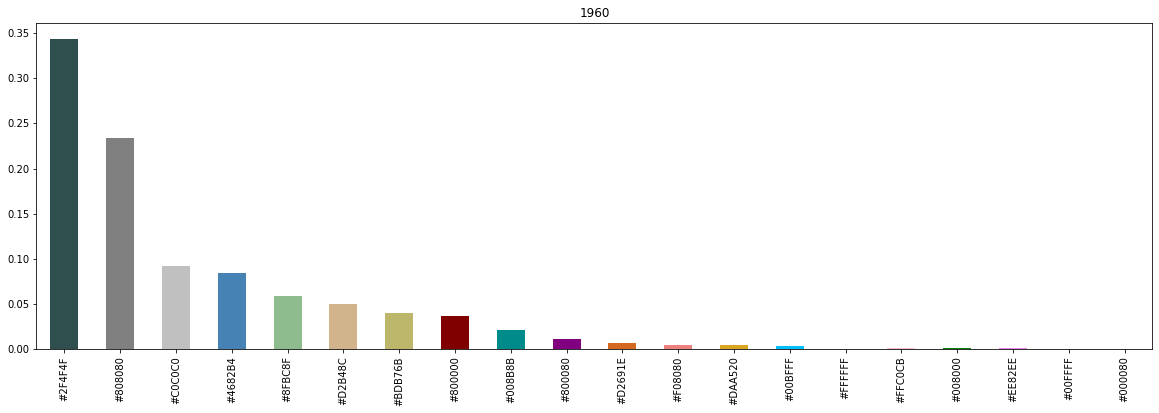

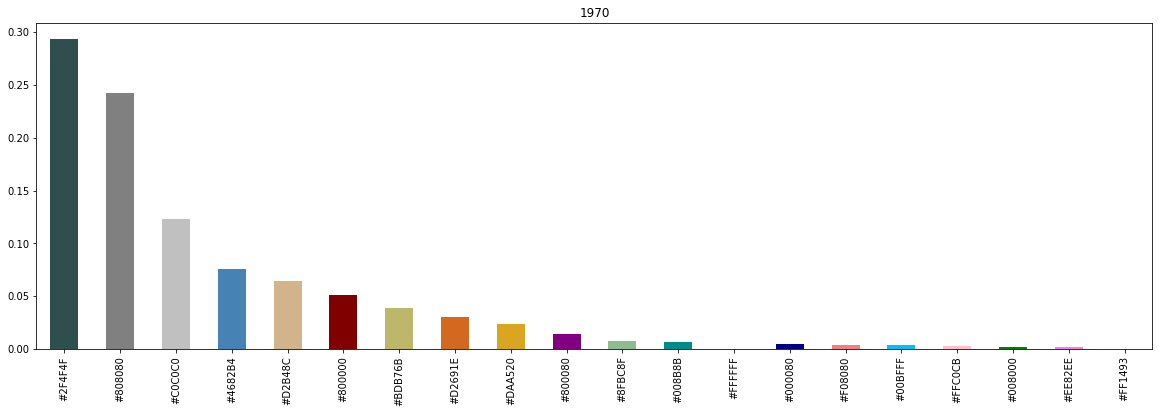

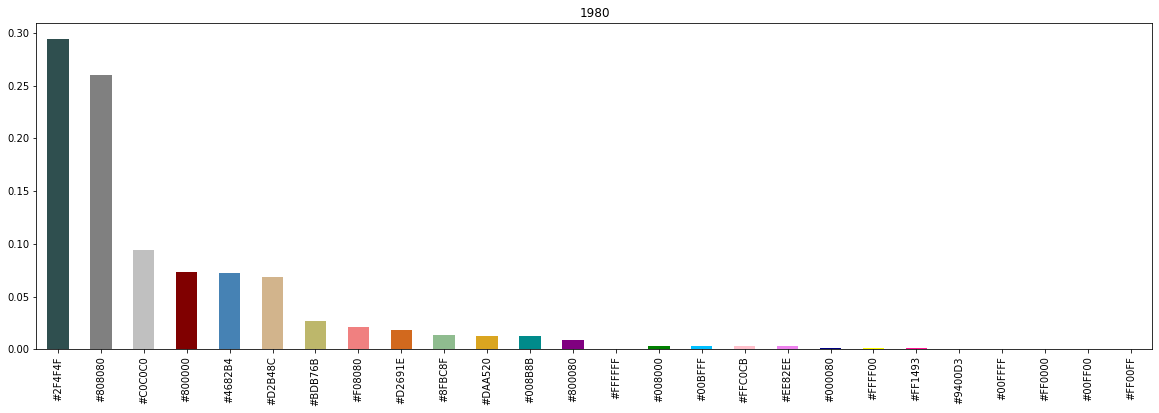

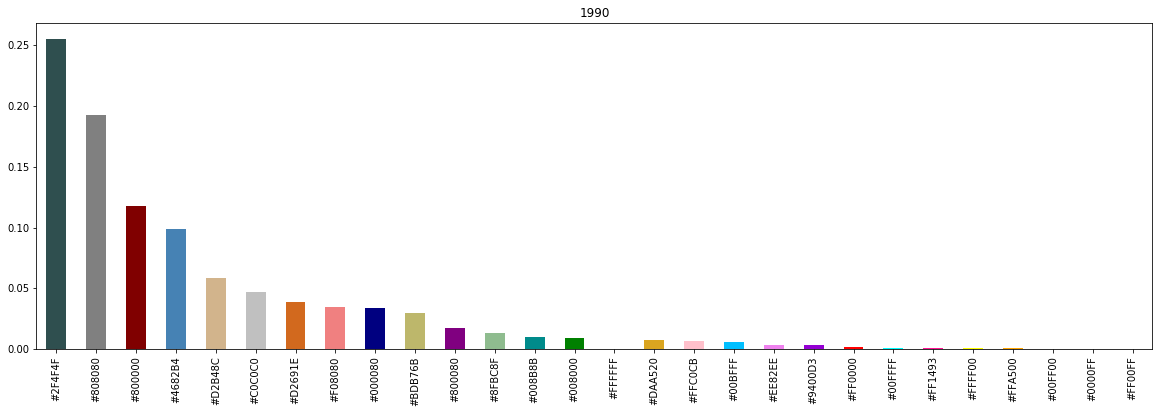

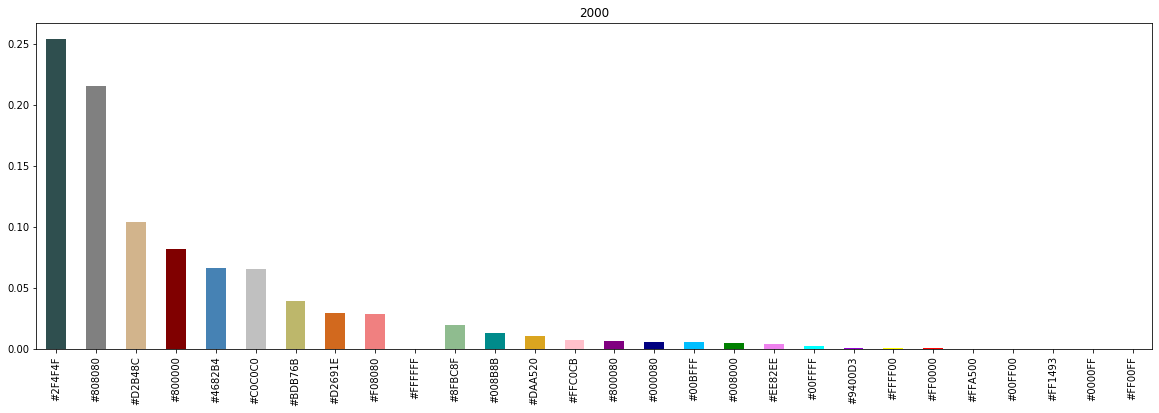

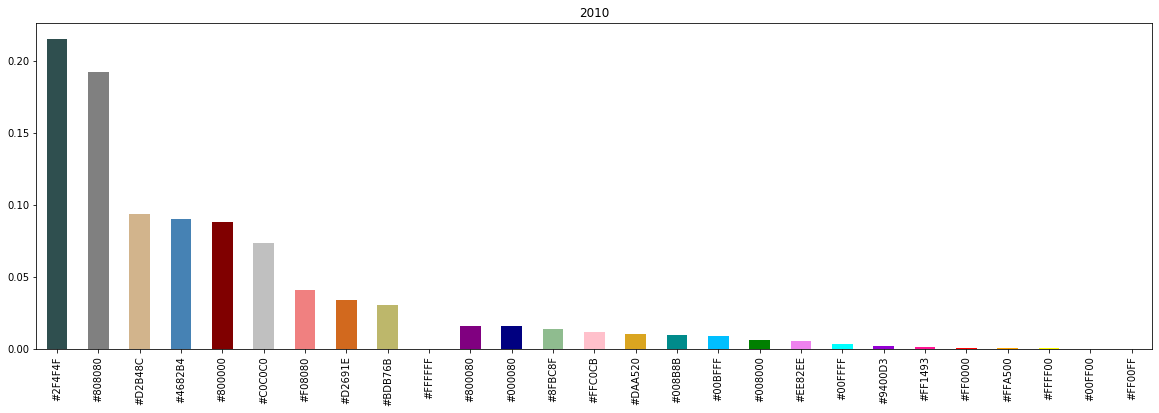

In [30]:
plot_color_for_each_decade(css4_cdf)

### Colors distributions by decade

In [31]:
def plot_each_color_by_decade(df):
    plt.figure(figsize=(15, 21)) 
    i = 1
    ref_colors = set(df['ref_color'].unique())
    for rc in ref_colors:
        decades = df[df['ref_color'] == rc]['year']
        plt.subplot(7, 4, i)
        #decades.plot.bar(color = rc, density=True)
        dvc = decades.value_counts()
        x = list(dvc.keys())
        y = []
        for k in x:
            num = float(dvc[k])
            den = float(df[df['year'] == k].shape[0])
            result = num / den
            y.append(result)

        plt.bar(x,y,color=rc, width=6, edgecolor='black' if rc == '#FFFFFF' else None, linewidth=1)
        plt.title(CSS4_INV_MAP[rc])
        i += 1
        
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.show()
    return

#### CSS

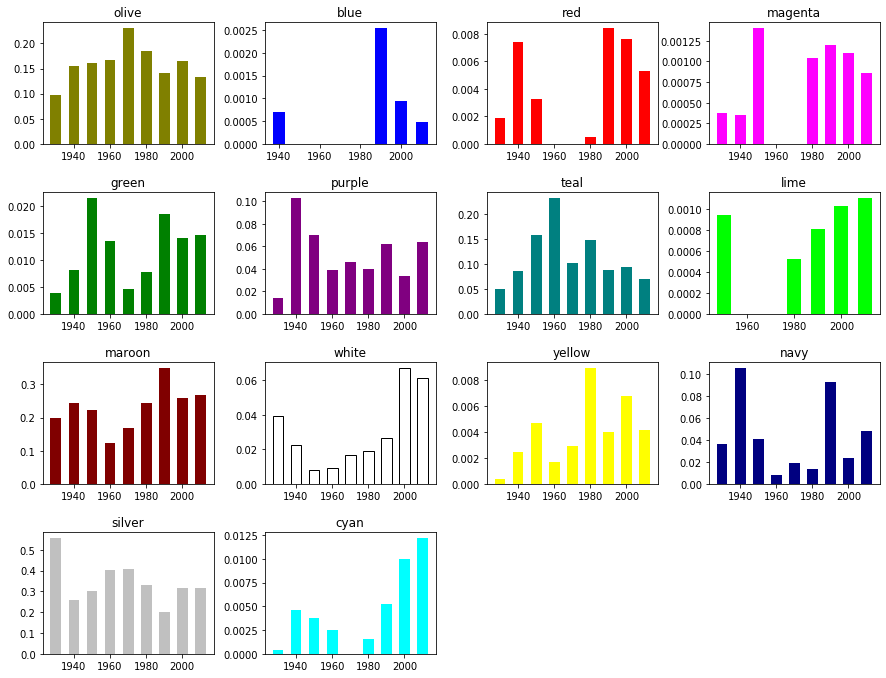

In [32]:
plot_each_color_by_decade(css_cdf)

#### CSS4

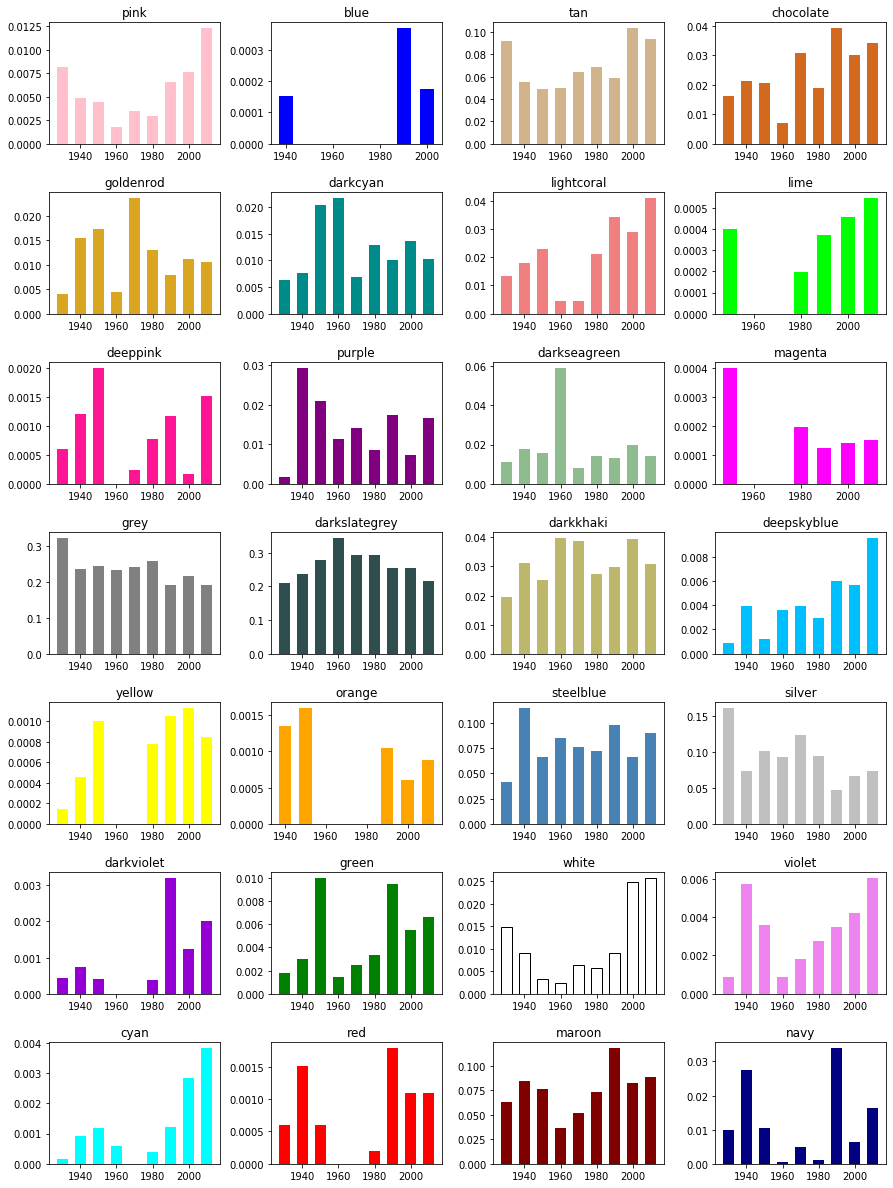

In [33]:
plot_each_color_by_decade(css4_cdf)

## Prove CSS4 FULL

In [43]:
test_cdf = cdf.copy()

In [44]:
%%time
add_ref_column(test_cdf, 'CSS4')
test_cdf.head()

CPU times: user 2min 49s, sys: 322 ms, total: 2min 49s
Wall time: 2min 48s


,movie_id,movie_title,year,frame_id,centroid_id,rgb,CSS_ref_color_rgb,CSS_ref_color_hex,CSS4_SEL_ref_color_rgb,CSS4_SEL_ref_color_hex,CSS4_ref_color_rgb,CSS4_ref_color_hex
0,0,make_mine_music,1940,0,0,"(0.4948409661638601, 0.3336431652742103, 0.382...","(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.4117647058823529, 0.4117647058823529, 0.411...",#696969
1,0,make_mine_music,1940,0,1,"(0.5387126649529148, 0.5742250325642928, 0.639...","(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.4666666666666667, 0.5333333333333333, 0.6)",#778899
2,0,make_mine_music,1940,0,2,"(0.36366959978116187, 0.4204748239497644, 0.55...","(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.27450980392156865, 0.5098039215686274, 0.70...",#4682B4,"(0.4392156862745098, 0.5019607843137255, 0.564...",#708090
3,0,make_mine_music,1940,0,3,"(0.2441414631891009, 0.31293046306577865, 0.42...","(0.5019607843137255, 0.5019607843137255, 0.501...",#808080,"(0.1843137254901961, 0.30980392156862746, 0.30...",#2F4F4F,"(0.1843137254901961, 0.30980392156862746, 0.30...",#2F4F4F
4,0,make_mine_music,1940,0,4,"(0.7276261576840661, 0.7455248882923641, 0.815...","(0.7529411764705882, 0.7529411764705882, 0.752...",#C0C0C0,"(0.7529411764705882, 0.7529411764705882, 0.752...",#C0C0C0,"(0.6901960784313725, 0.7686274509803922, 0.870...",#B0C4DE


In [45]:
test_cdf.drop(
    [
        'CSS_ref_color_rgb', 'CSS_ref_color_hex',
        'CSS4_SEL_ref_color_rgb', 'CSS4_SEL_ref_color_hex',
        'CSS4_ref_color_rgb'
    ],
    axis=1,
    inplace=True
)

In [46]:
test_cdf.rename(columns={"CSS4_ref_color_hex": "ref_color"}, inplace=True)

In [47]:
test_cdf.head()

,movie_id,movie_title,year,frame_id,centroid_id,rgb,ref_color
0,0,make_mine_music,1940,0,0,"(0.4948409661638601, 0.3336431652742103, 0.382...",#696969
1,0,make_mine_music,1940,0,1,"(0.5387126649529148, 0.5742250325642928, 0.639...",#778899
2,0,make_mine_music,1940,0,2,"(0.36366959978116187, 0.4204748239497644, 0.55...",#708090
3,0,make_mine_music,1940,0,3,"(0.2441414631891009, 0.31293046306577865, 0.42...",#2F4F4F
4,0,make_mine_music,1940,0,4,"(0.7276261576840661, 0.7455248882923641, 0.815...",#B0C4DE


In [48]:
#test_cdf = remove_outliers(test_cdf, ['#000000', '#696969', '#2F4F4F'])

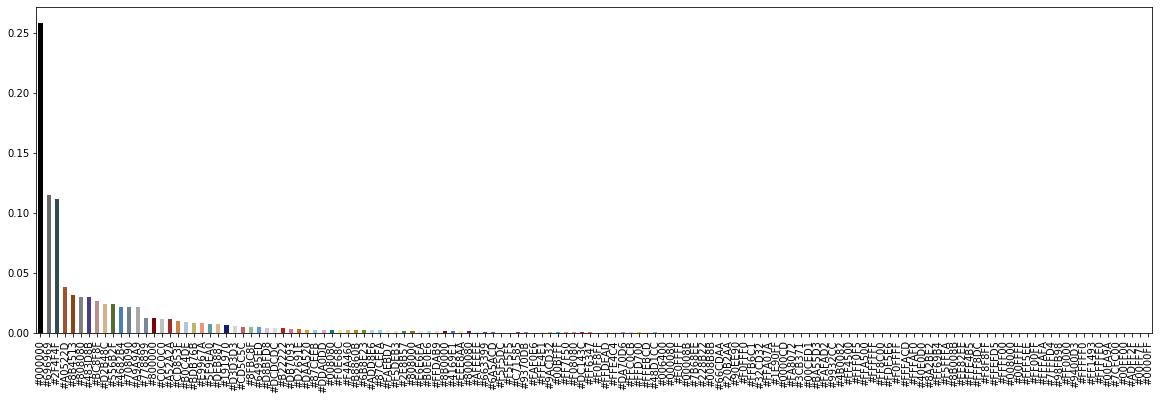

In [49]:
plot_ref_colors(test_cdf, normalize=True)

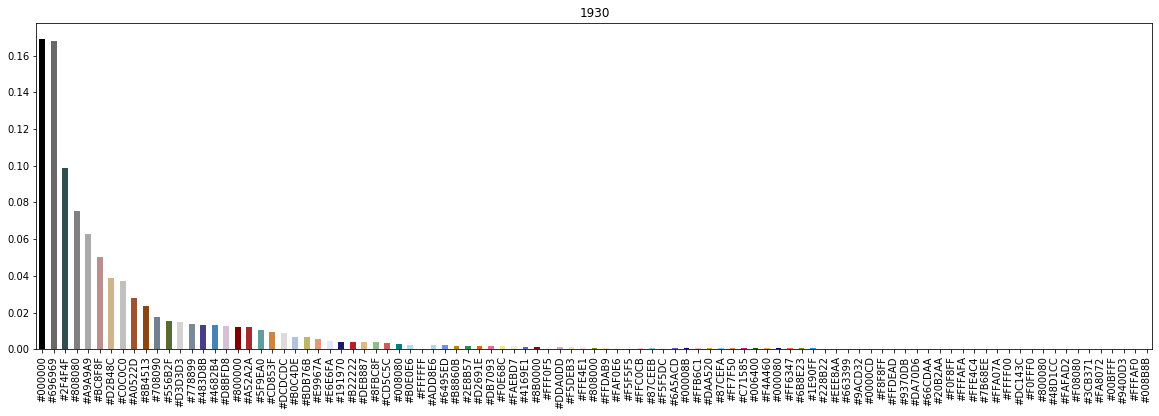

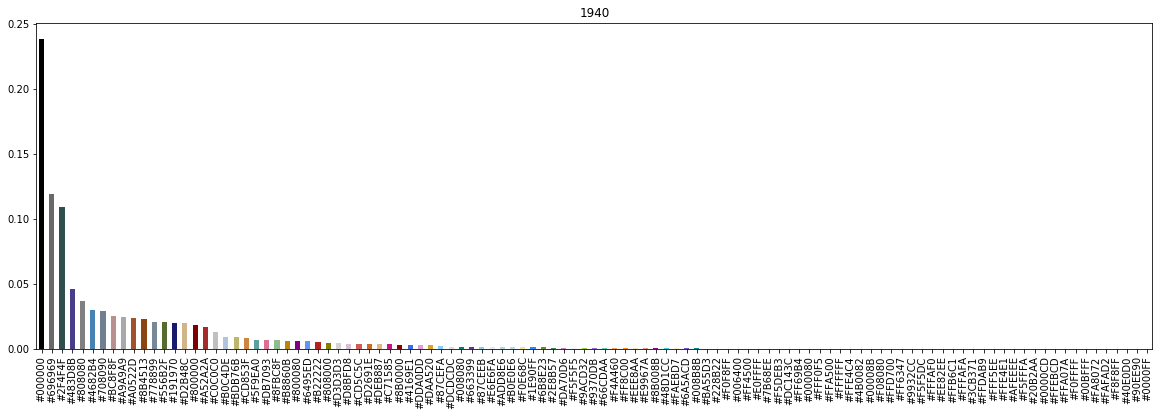

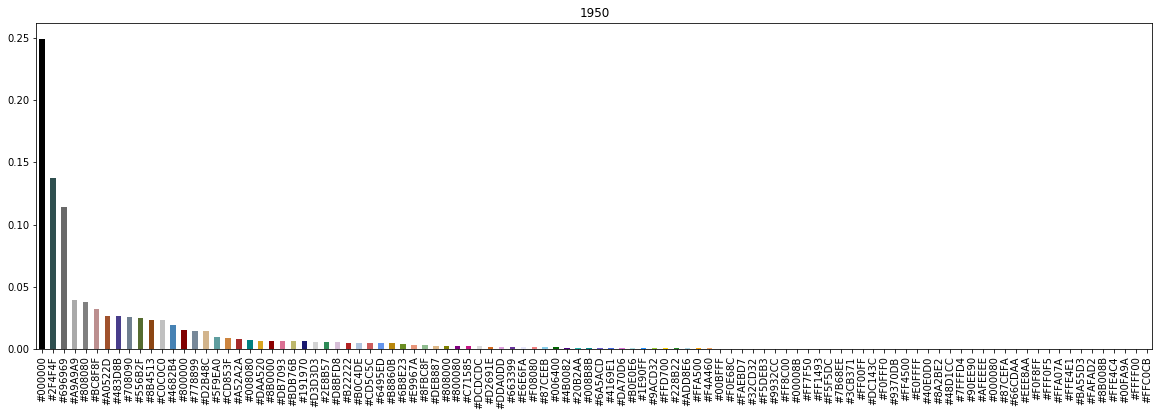

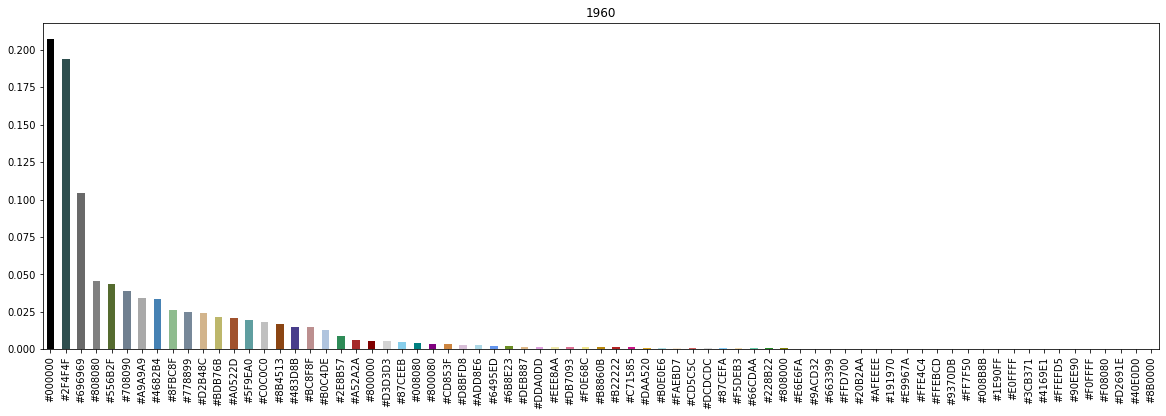

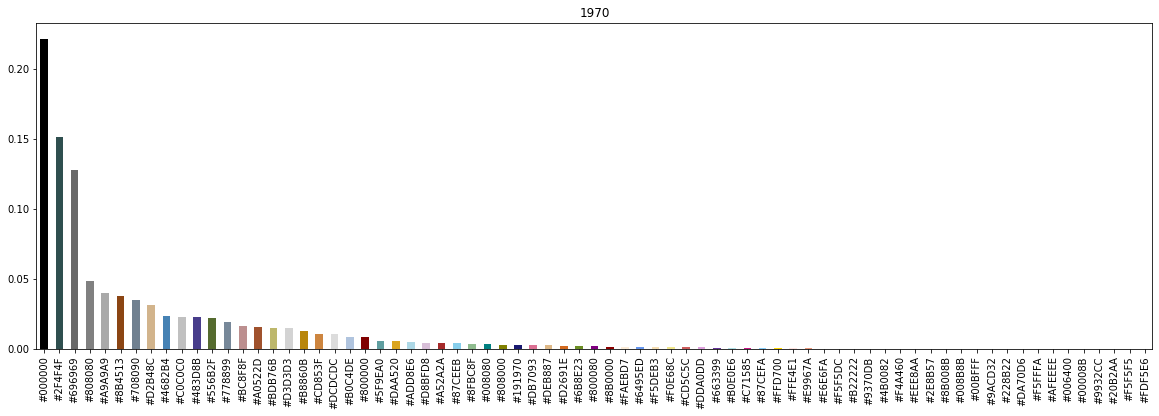

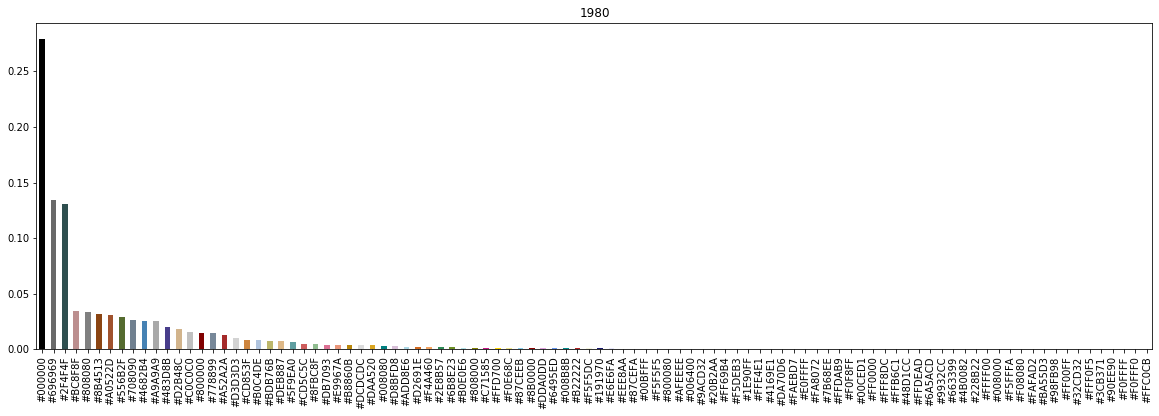

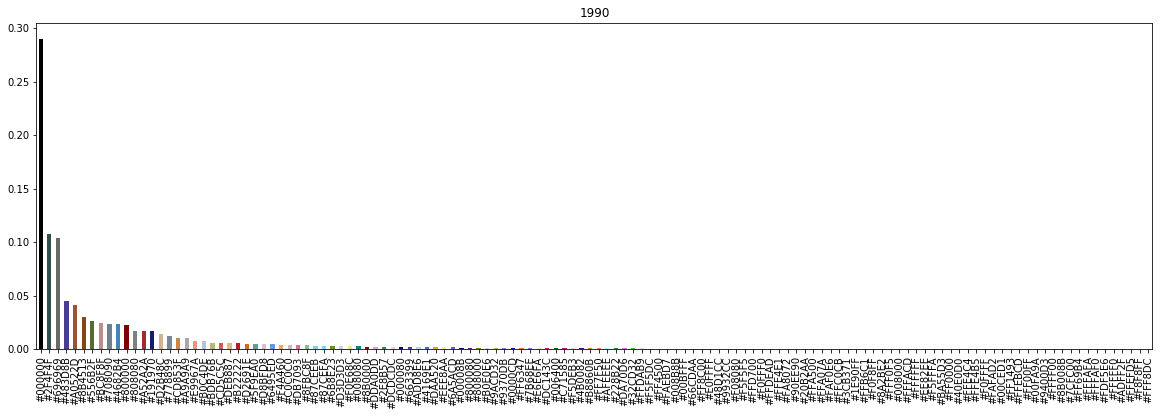

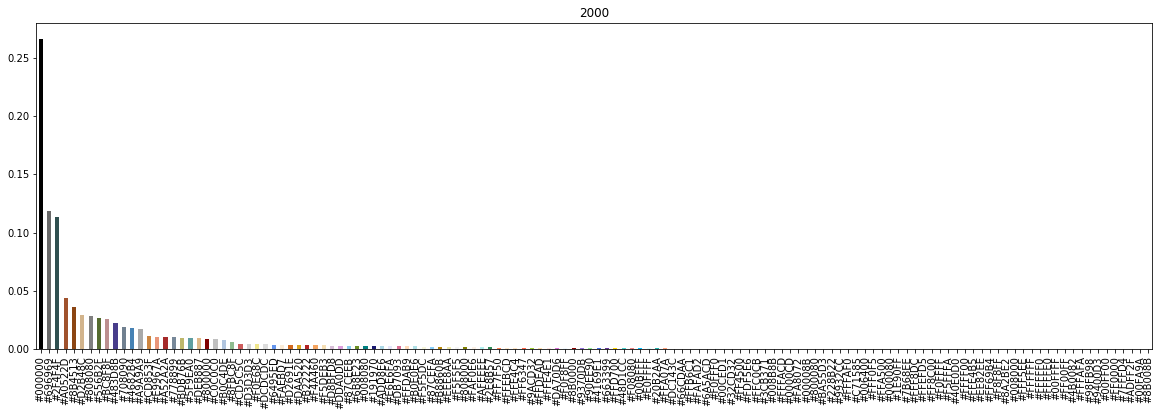

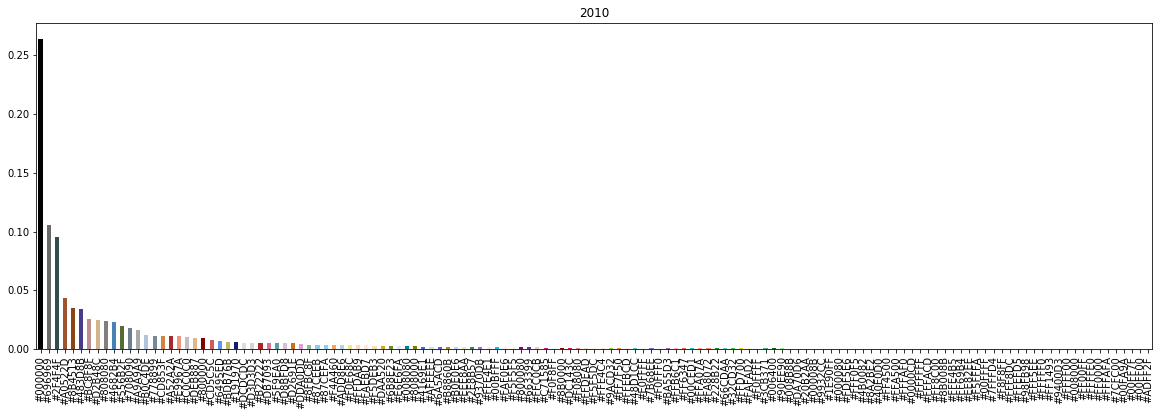

In [50]:
plot_color_for_each_decade(test_cdf)

### Auto selection for CSS4

In [51]:
full_css4_df = cdf.copy()

In [69]:
vc = dict(test_cdf['ref_color'].value_counts(normalize=True))
len(vc)

138

In [72]:
sel_1 = set([k for k,v in vc.items() if v >= 0.001])
len(sel_1)

64

### DVVA

In [ ]:
# generate csv
cdf[cdf['CSS4_ref_color_hex'] != '#000000'] \
    .rename(columns={"CSS4_ref_color_hex": "ref_color"}) \
    .drop(columns=['CSS4_ref_color_rgb', 'rgb']) \
    .groupby(by=['year', 'ref_color']).size().reset_index(name='counts') \
    .to_csv('decade_ref_colors_counts.csv', index=False)

In [ ]:
# sort by hue (as rainbow)
import colorsys

def get_hsv(hexrgb):
    hexrgb = hexrgb.lstrip("#")   # in case you have Web color specs
    r, g, b = (int(hexrgb[i:i+2], 16) / 255.0 for i in range(0,5,2))
    return colorsys.rgb_to_hsv(r, g, b)

In [ ]:
color_list = list(cdf['CSS4_ref_color_hex'].unique())
print(color_list)

In [ ]:
color_list.sort(key=get_hsv)
print(color_list)